# Led e Fotodiodi

**Informazioni generali.** Misure di base e caratterizazione di LED e fotodiodi con l'obiettivo di familiarizzazione

Dettagli del setup:
* Circuito con LED guidato in corrente tramite tensione comandata da AD2
* Circuito con fotodiodo per rivelazione di intensità luminosa in madalità fotoconduttiva

## Informazioni sui led

A partire dal contenitore dei LED si prendono informazioni riguardo i loro regimi di funzionamento, riportate di seguito.

| Colore | corrente di funzionamento [$mA$] | voltaggio di funzionamento [$V$] | intensità luminosa [$mcd$] |
| :-: | :-: | :-: | :-: |
| rosso | 20 | 2-2.2 | 600-800 |
| arancione | 20 | 1.8-2 | 600-800 |
| giallo | 20 | 1.8-2 | 600-800 |
| verde | 20 | 3-3.2 | 2000-3000 |
| blu | 20 | 3-3.2 | 600-800 |
| viola | 20 | 3.2-3.4 | 200-400 |

Si realizza il più semplice circuito per guidare i diodi, composto di resistore di limitazione di acorrente e generatore di funzioni di AD2 come alimentazione.
Il resistore di limitazione utilizzato ha valore $ R = 469.98\Omega $. Considerando la caduta di potenziale programma ta sulla resitenza ci aspettiamo una corrente massima $I_{LED} = \frac{V_{in}}{R} \sim 10mV $ , la quale non dovrebbe essere un problema per alcuno dei led disponibili.

Si è realizzato il circuito in figura, acquisendo i dati con il programma sweepbias.ipynb con una spazzata lungo il voltaggio misurando tensione sul diodo e tensione sul resistore( dalla quale si è poi ricavata la corrente).
Si è annotata la tensione a cui il diodo si accendeva, avendolo stimato grezzamente l'incertezza associata ai valori nella tabella seguente è di 0.2V

|           |	Voltaggio a cui inizia a brillare [V] |
| :-: | :-: |
|Rosso		|1.6 	|				
|arancione |	1.7 |					
|giallo 	|	1.7	|				
|verde		|2.1	|				
|azzurro	|	2.4	|				
|viola		|2.6	|				


Si è inoltre graficata la corrente nel circuito contro la tensione sul diodo, riportato di seguito.




0


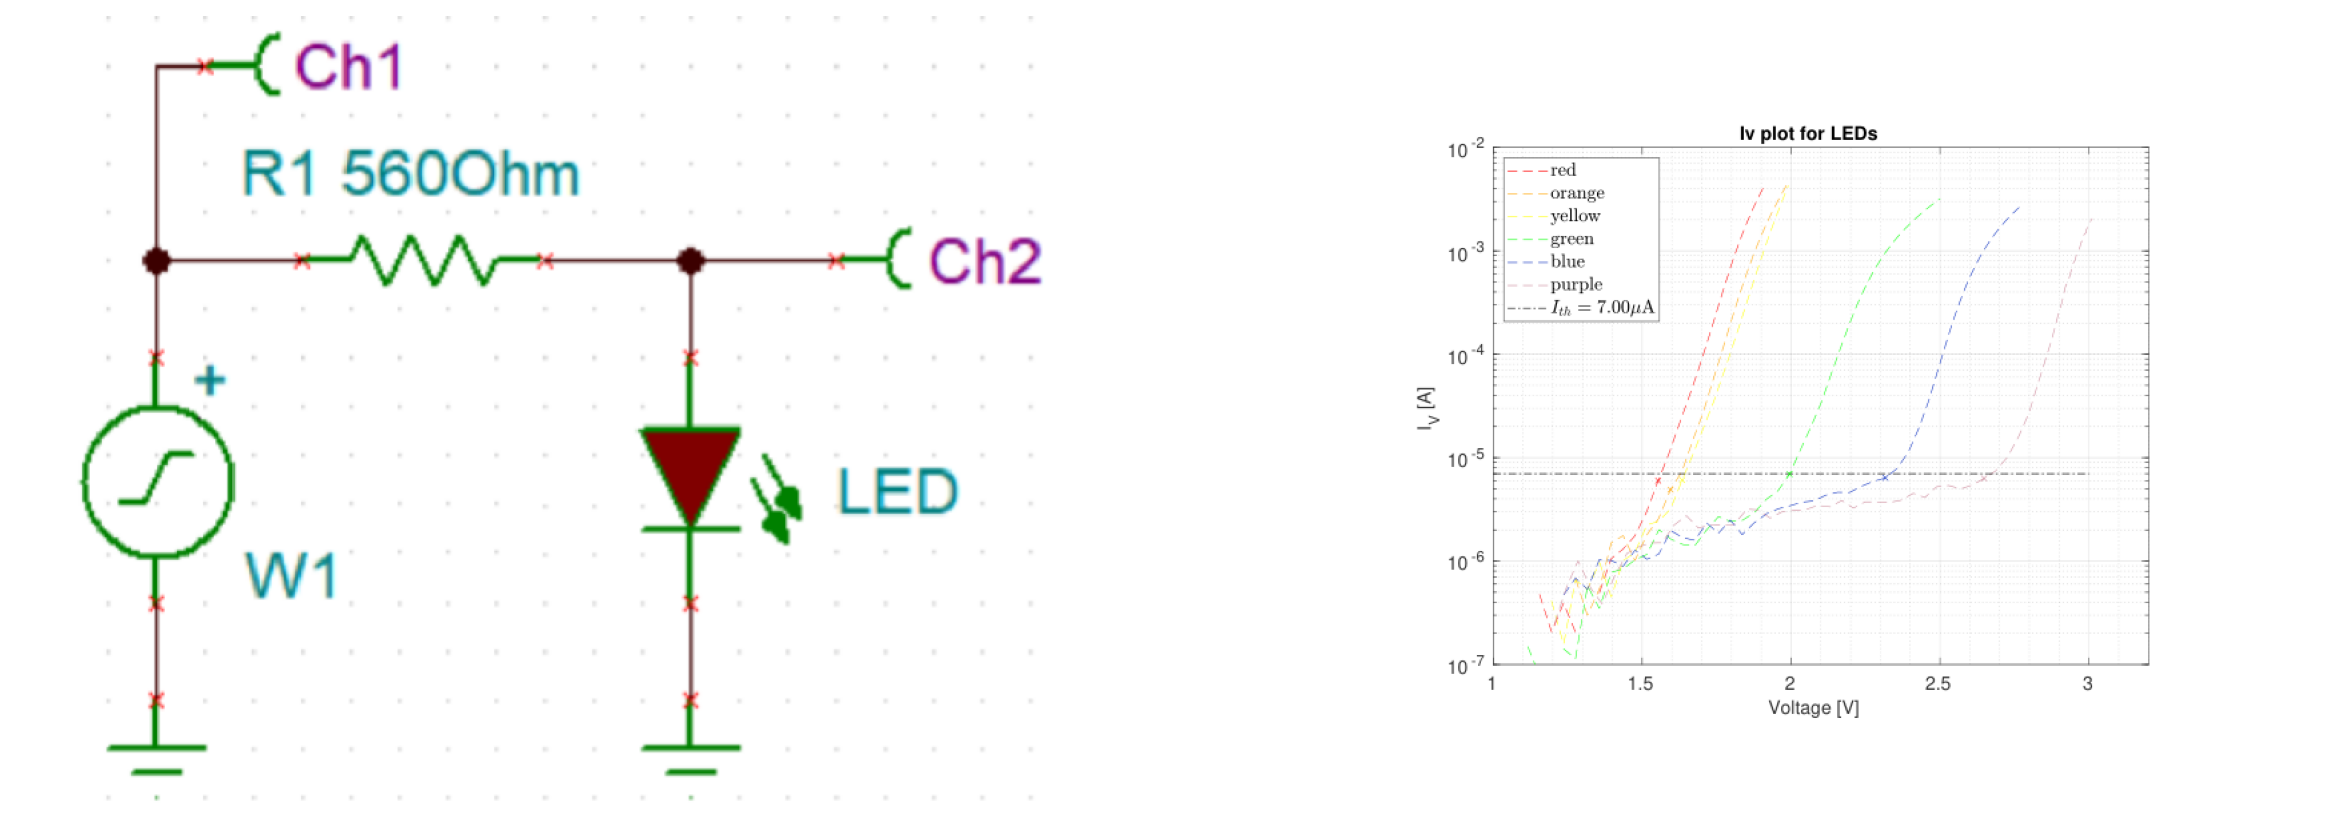

In [2]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            axes[i].imshow(imgList[i])
            axes[i].axis('off')
        else:
            for j in range(cols):
                try:
                    axes[i][j].imshow(imgList[i*cols+j])
                    axes[i][j].axis('off')
                except:
                    pass
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/circ1.pdf', 'Media/LED.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


## Spettro dei LED

Essendoci stati forniti dati riguardanti gli spettri di emissione dei LED utilizzati si è effettuata un'analisi di quest'ultimi e li si è fittati con delle lorentziane in maniera tale da  ottenere lunghezza d'onda di emissione massima e massima intensità di emissione, tutto riportato di seguito



0


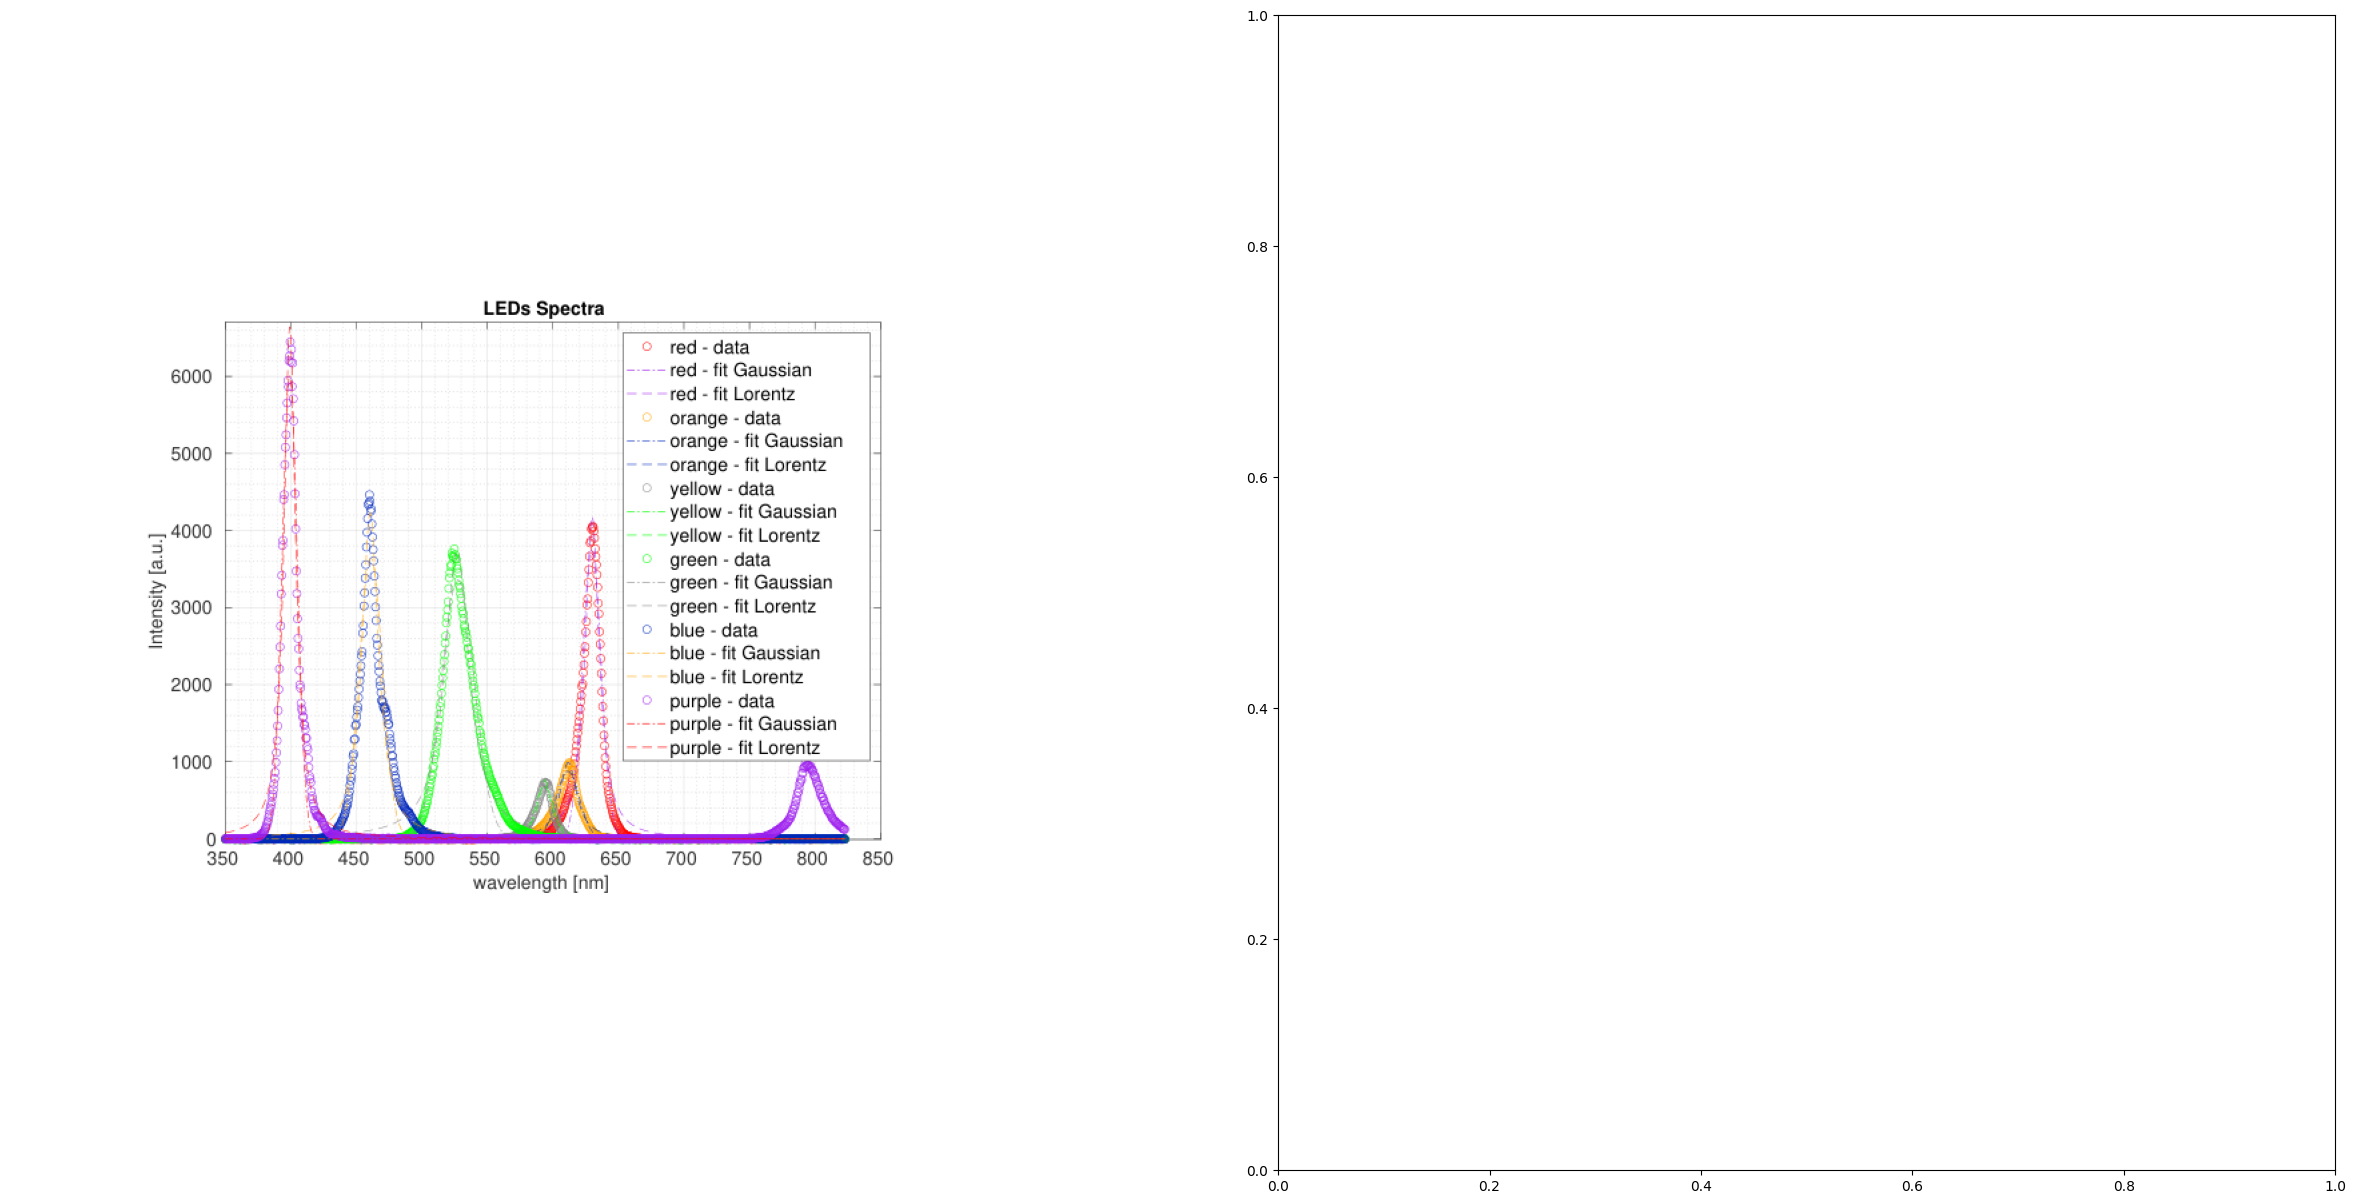

In [9]:
pdfList = ['Media/Spectra.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

|           |	lunghezza d'onda media [$\mathrm{nm}^{-1}$]|
| :-: | :-: |
|rosso		| 629.9 $\pm$ 16.4 |
|arancione  | 611.7 $\pm$ 20.8 |
|giallo 	| 593.8 $\pm$ 17.6 |
|verde		| 526.8 $\pm$ 41.2 |
|azzurro	| 460.6 $\pm$ 35.8 |
|viola		| 399.3 $\pm$ 33.4 |


## Misura della costante di Planck

Data la celeberrima equazione per la lunghezza d'onda di un fotone data la sua energia, ossia $ E = \frac{hc}{\lambda} \approx \frac{1240}{\lambda[\mathrm{nm}]}\mathrm{eV} $, si osserva facilmante come, graficando la tensione di attivazione contro l'inverso della lunghezza d'onda( numero d'onda) in nanometri si dovrebbe ottenere dei punti giacenti su una retta con inclinazione $ m \sim 1240 $, dunque si può utilizzare questo risultato, data per note la velocità della luce nel vuoto, per ottenere una misura della costante di Planck.
Ciò è stato effettuato e si ottiene una misura di h compatibile col valore teorico in $\mathrm{\frac{eV}{Hz}} $ entro una sigma della misura, nonché entro il 2% del valore teorico.



0


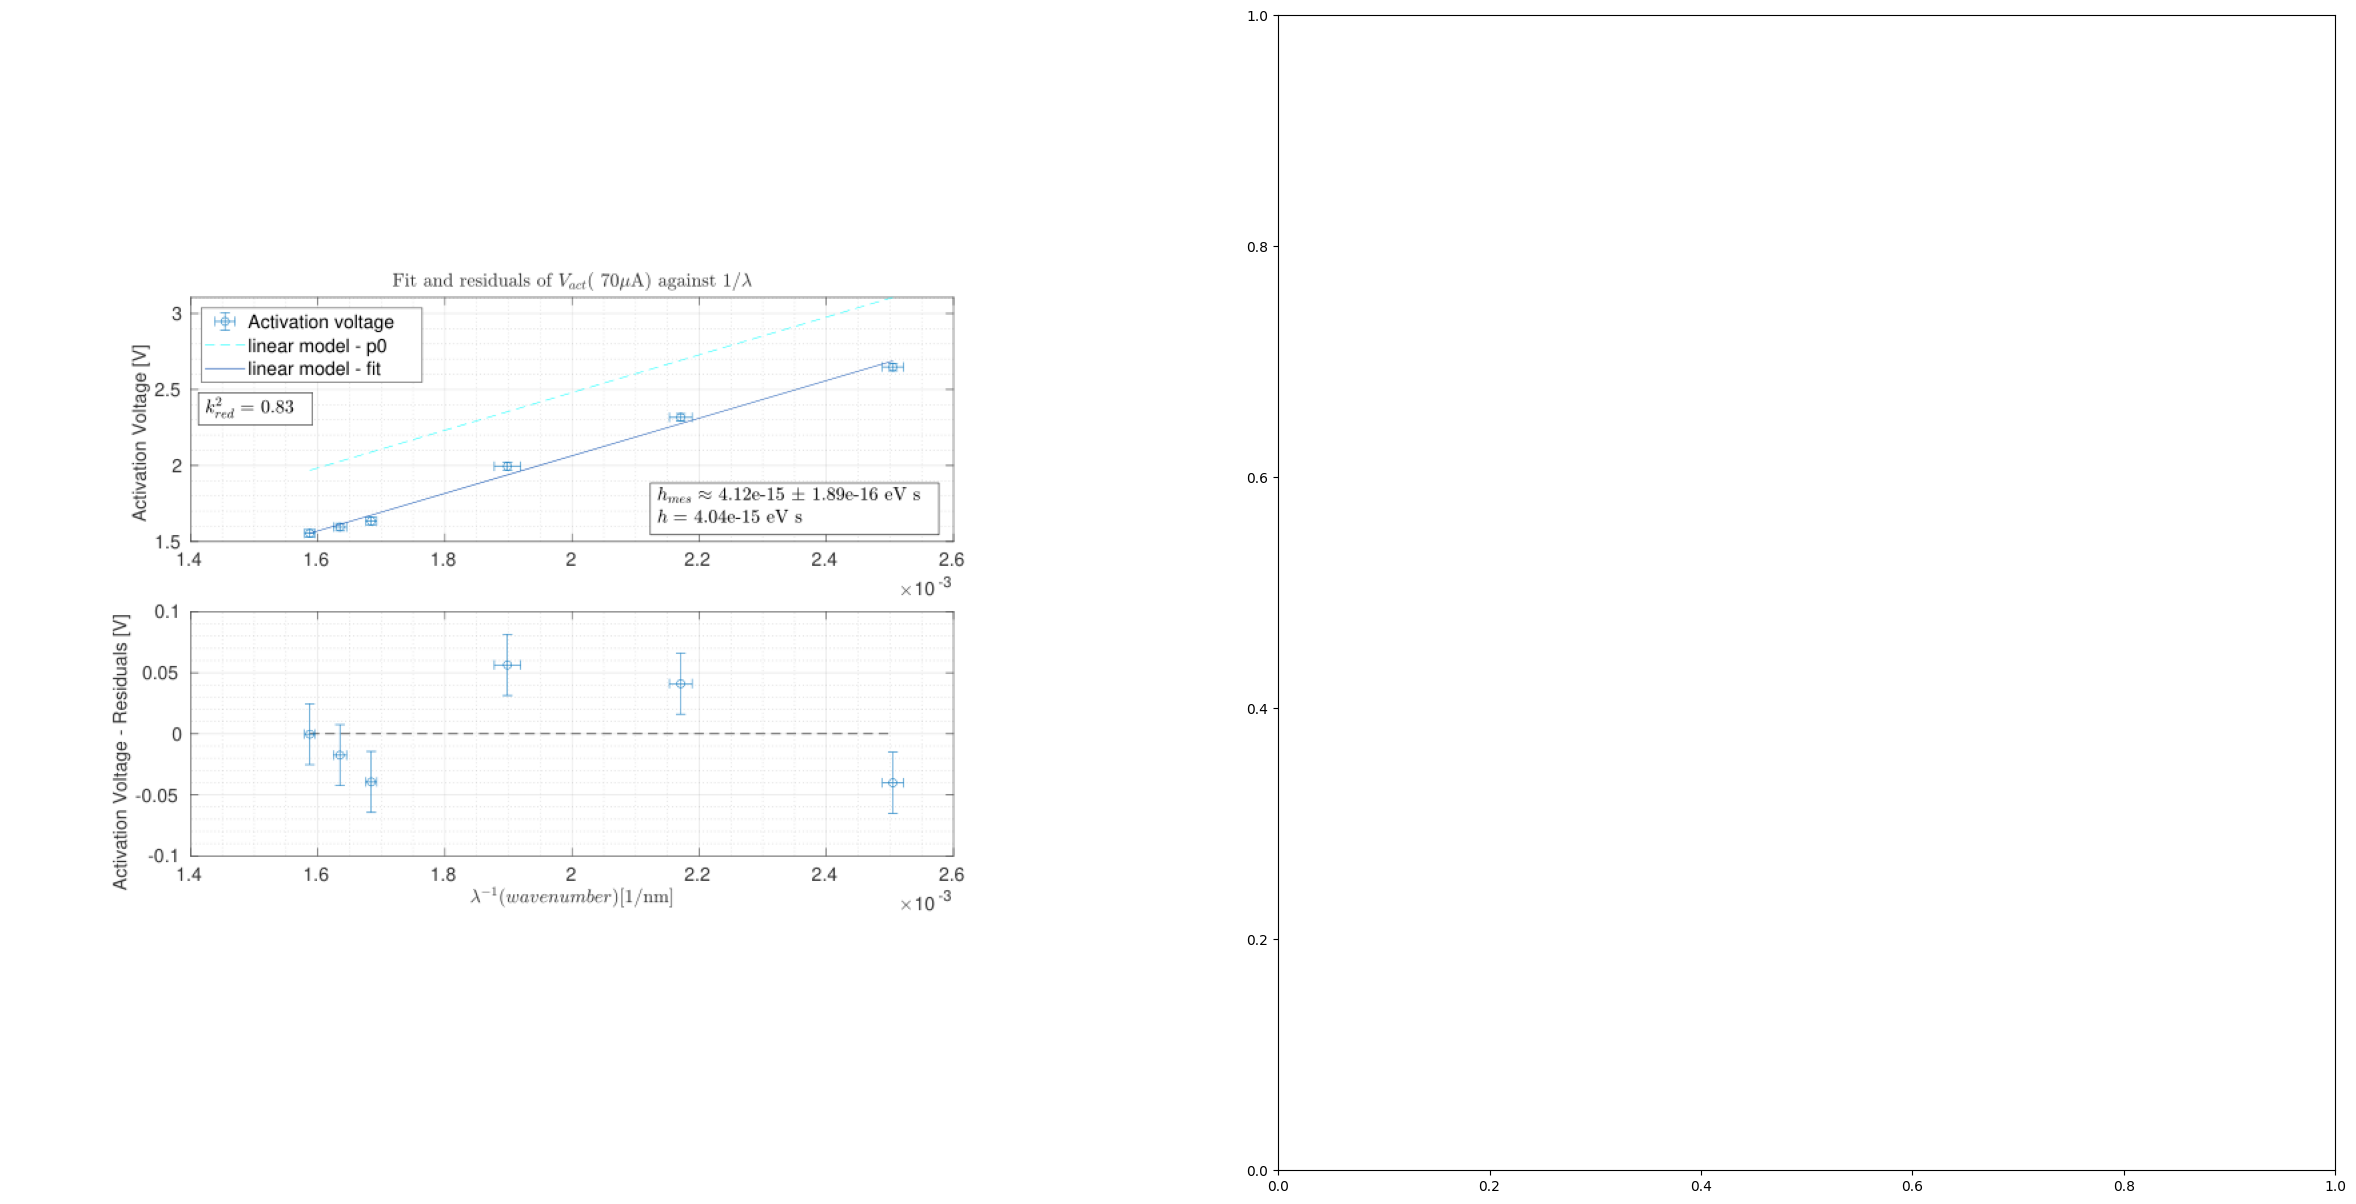

In [13]:
pdfList = ['Media/Planck.pdf']
cols  = 2
rows = 1
display_pdfs_side_by_side(rows, cols, pdfList)

## Studio con fotodiodo

Successivamente si è collegato il fotodiodo in funzionamento fotoconduttivo a un amplificatore a transimpedenza e lo si è utilizzato per misurare l'emissione di varie sorgenti a nostra disposizione, come lampade fluorescenti nei soffitti, schermi di computer o torcie del cellulare.
Nella presa dati con le lampade fluorescenti si è ben in grado di identificare una componente variabile a 50HZ,  dovuta al flickering delle lampade. Qualsiasi altra presa non presenta flickering, e anche solamente orientando il fotodiodo orizzontalmente si vede l'intensità di queste oscillazioni diminuire molto, e comunque non si ritiene ciò possa essere problematico in quanto una presa dati più lungha di qualche millisecondo presenterà comunque media dipendente solo dall'intensità media della luce, facendo perdere dunque di importanza a eventuali picchi o gole dell'oscillazione

0


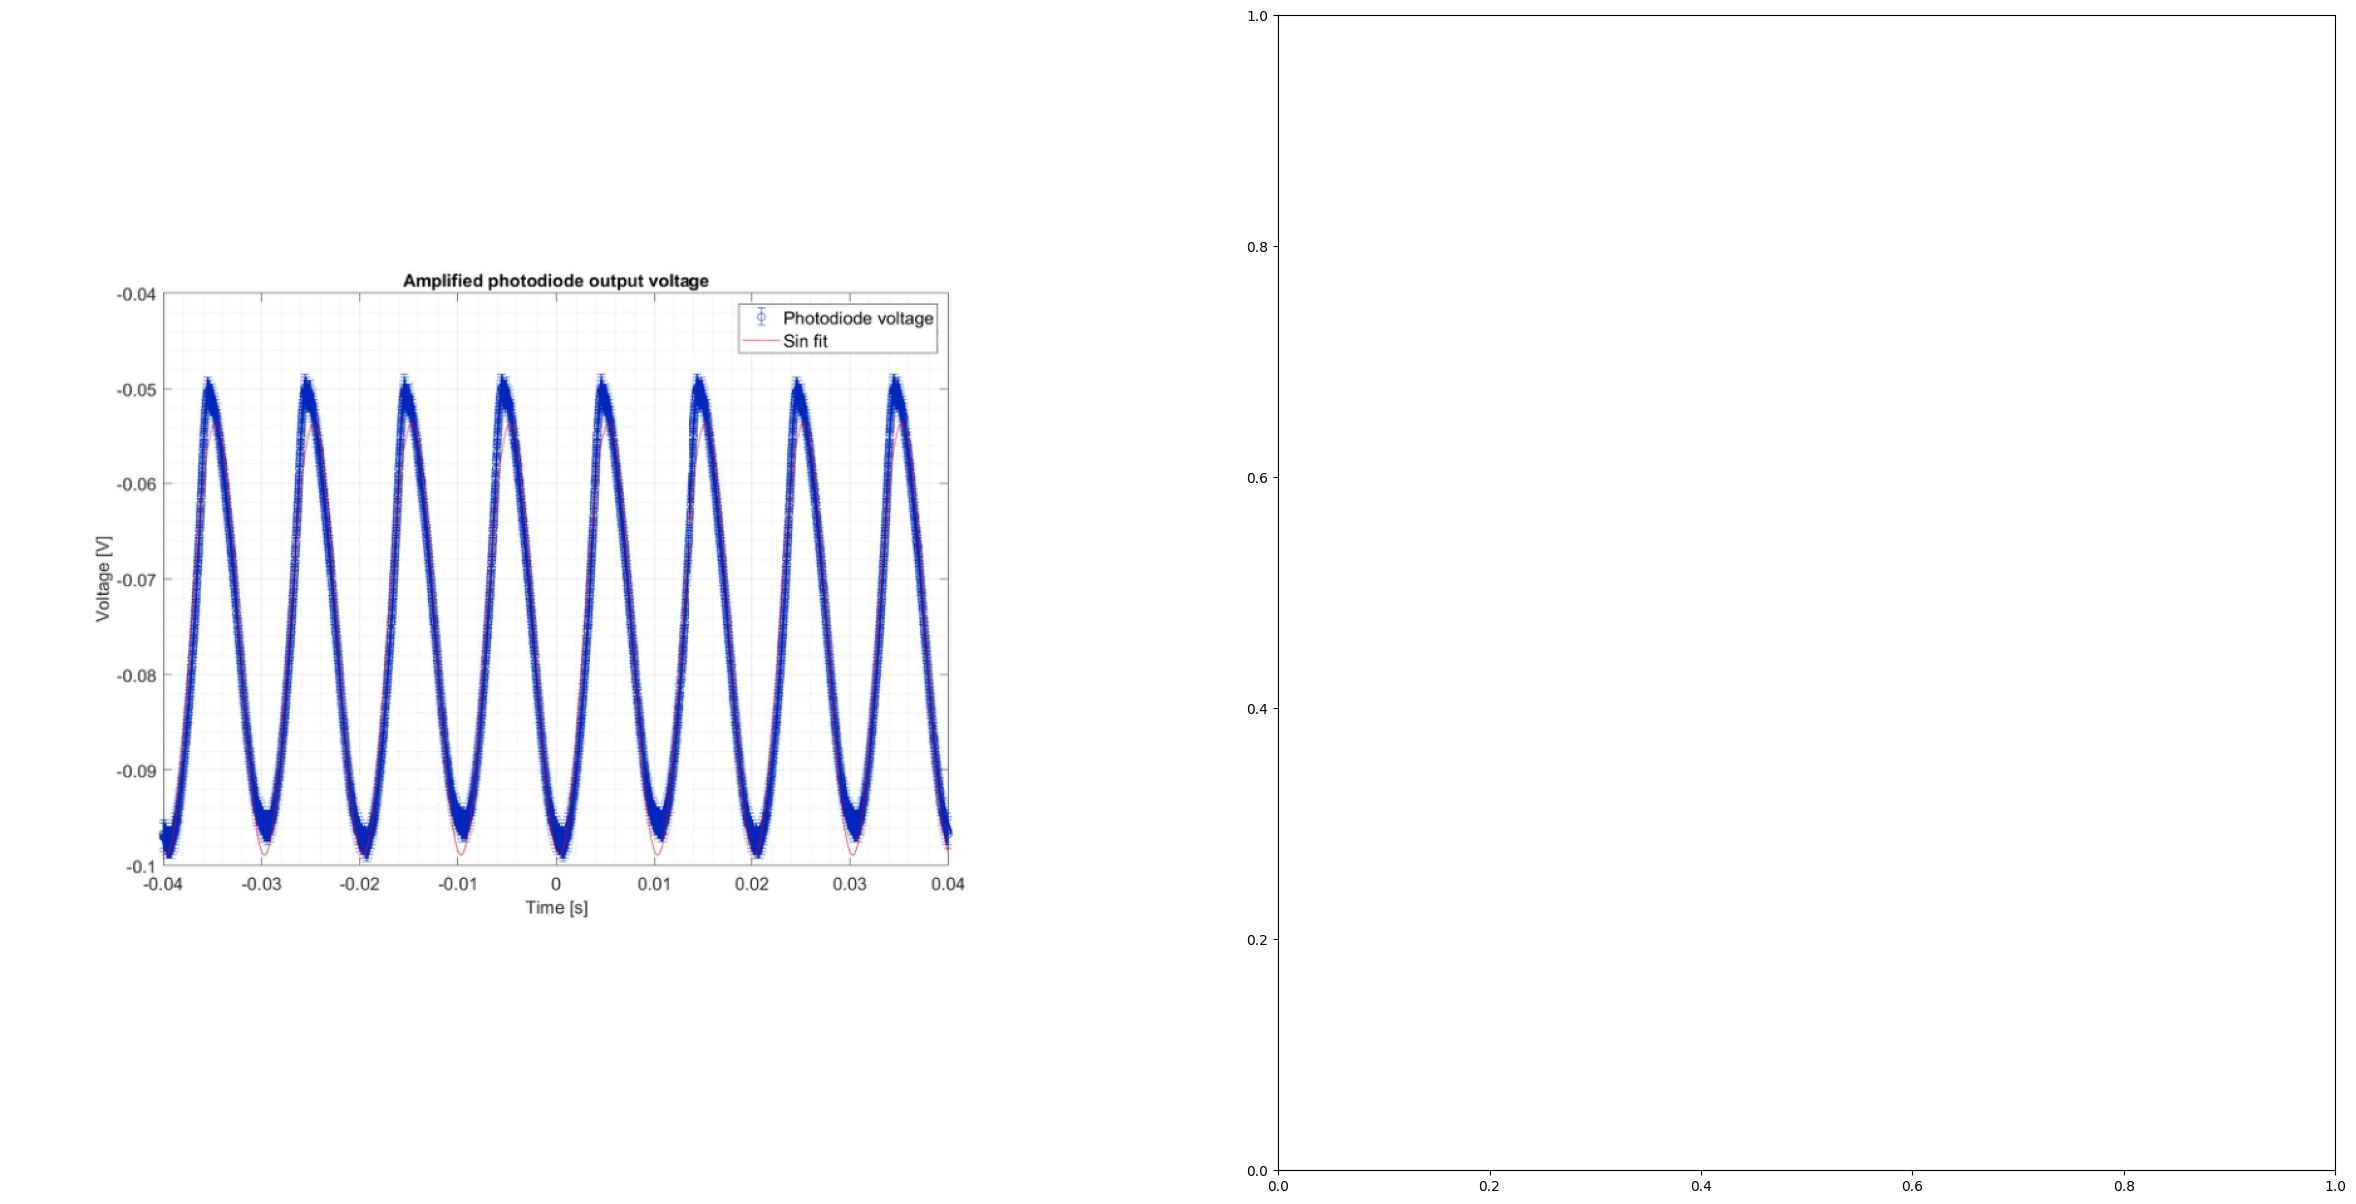

In [5]:
pdfList = ['Media/Sine.pdf']
cols  = 2
rows = 1
display_pdfs_side_by_side(rows, cols, pdfList)

Come è facile vedere il fit è tutt'altro che preciso, difatti si ottiene un termine $k^2_{red}$ superiore a 3, questo tuttavia era aspettato in quanto si osserva facilmente come la forma d'onda non sia perfettamente sinusoidale.
L'unico motivo per cui si è effettuato un fit è stato in realtà  per ottenere una frequenza di oscillazione del segnale, risultata essere $f_0 = 100.1 \pm 0.1  \mathrm{Hz} $, compatibile senza problemi coi 100Hz di frequenza di flickering aspettati dai tubi al Neon con reattore presenti nel laboratorio.


## Analisi risposta photodiodo
Successivamente si è assunta una presa dati per ogni LED al variare della tensione di alimentazione misurando sia la corrente che scorre nel LED( tramite misura di tensione su un resistore di valoro noto) e corrente prodotta dal fotodiodo nello stesso modo e si è analizzata la relazione tra queste due correnti. Il risultato è stato una successivamente analizzato per osservare se ci fosse una risposta comune del fotodiodo alle eccitazioni dei vari LED.

Seppure i LED fossero tutti alimentati allo stesso modo, i risultati mostrano grandi differenze sia uno dall'altro sia con la risposta spettrale presente nel datasheet, si è allora creduto ciò potesse essere dovuto al fatto che l'intensità emessa varia tra i differenti diodi, come mostrato nel grafico relativo agli spettri dei diodi, dunque si è riscalata la risposta del fotodiodo ad ogni emettitore sulla base dell'intensità di emissione presentata dal LED, tuttavia ciò non porta ancora a un risultato esatto.

Si crede ciò sia dovuto alle condizioni eguali di alimentazione mantenute tra tutti i LED, mentre questi ultimi potrebbero avere risposte diverse ad alimentazioni diverse, differenza che non si sarebbe riusciti ad osservare con i metodi da noi intrapresi.

I valori $k^2_{red}$ di tutti i fit sono compresi tra 0.7 e 1.4 con solo due all'infuori di questo range so 12 fit, si crede ciò sia dovuto a difficoltà nella presa dati.

0


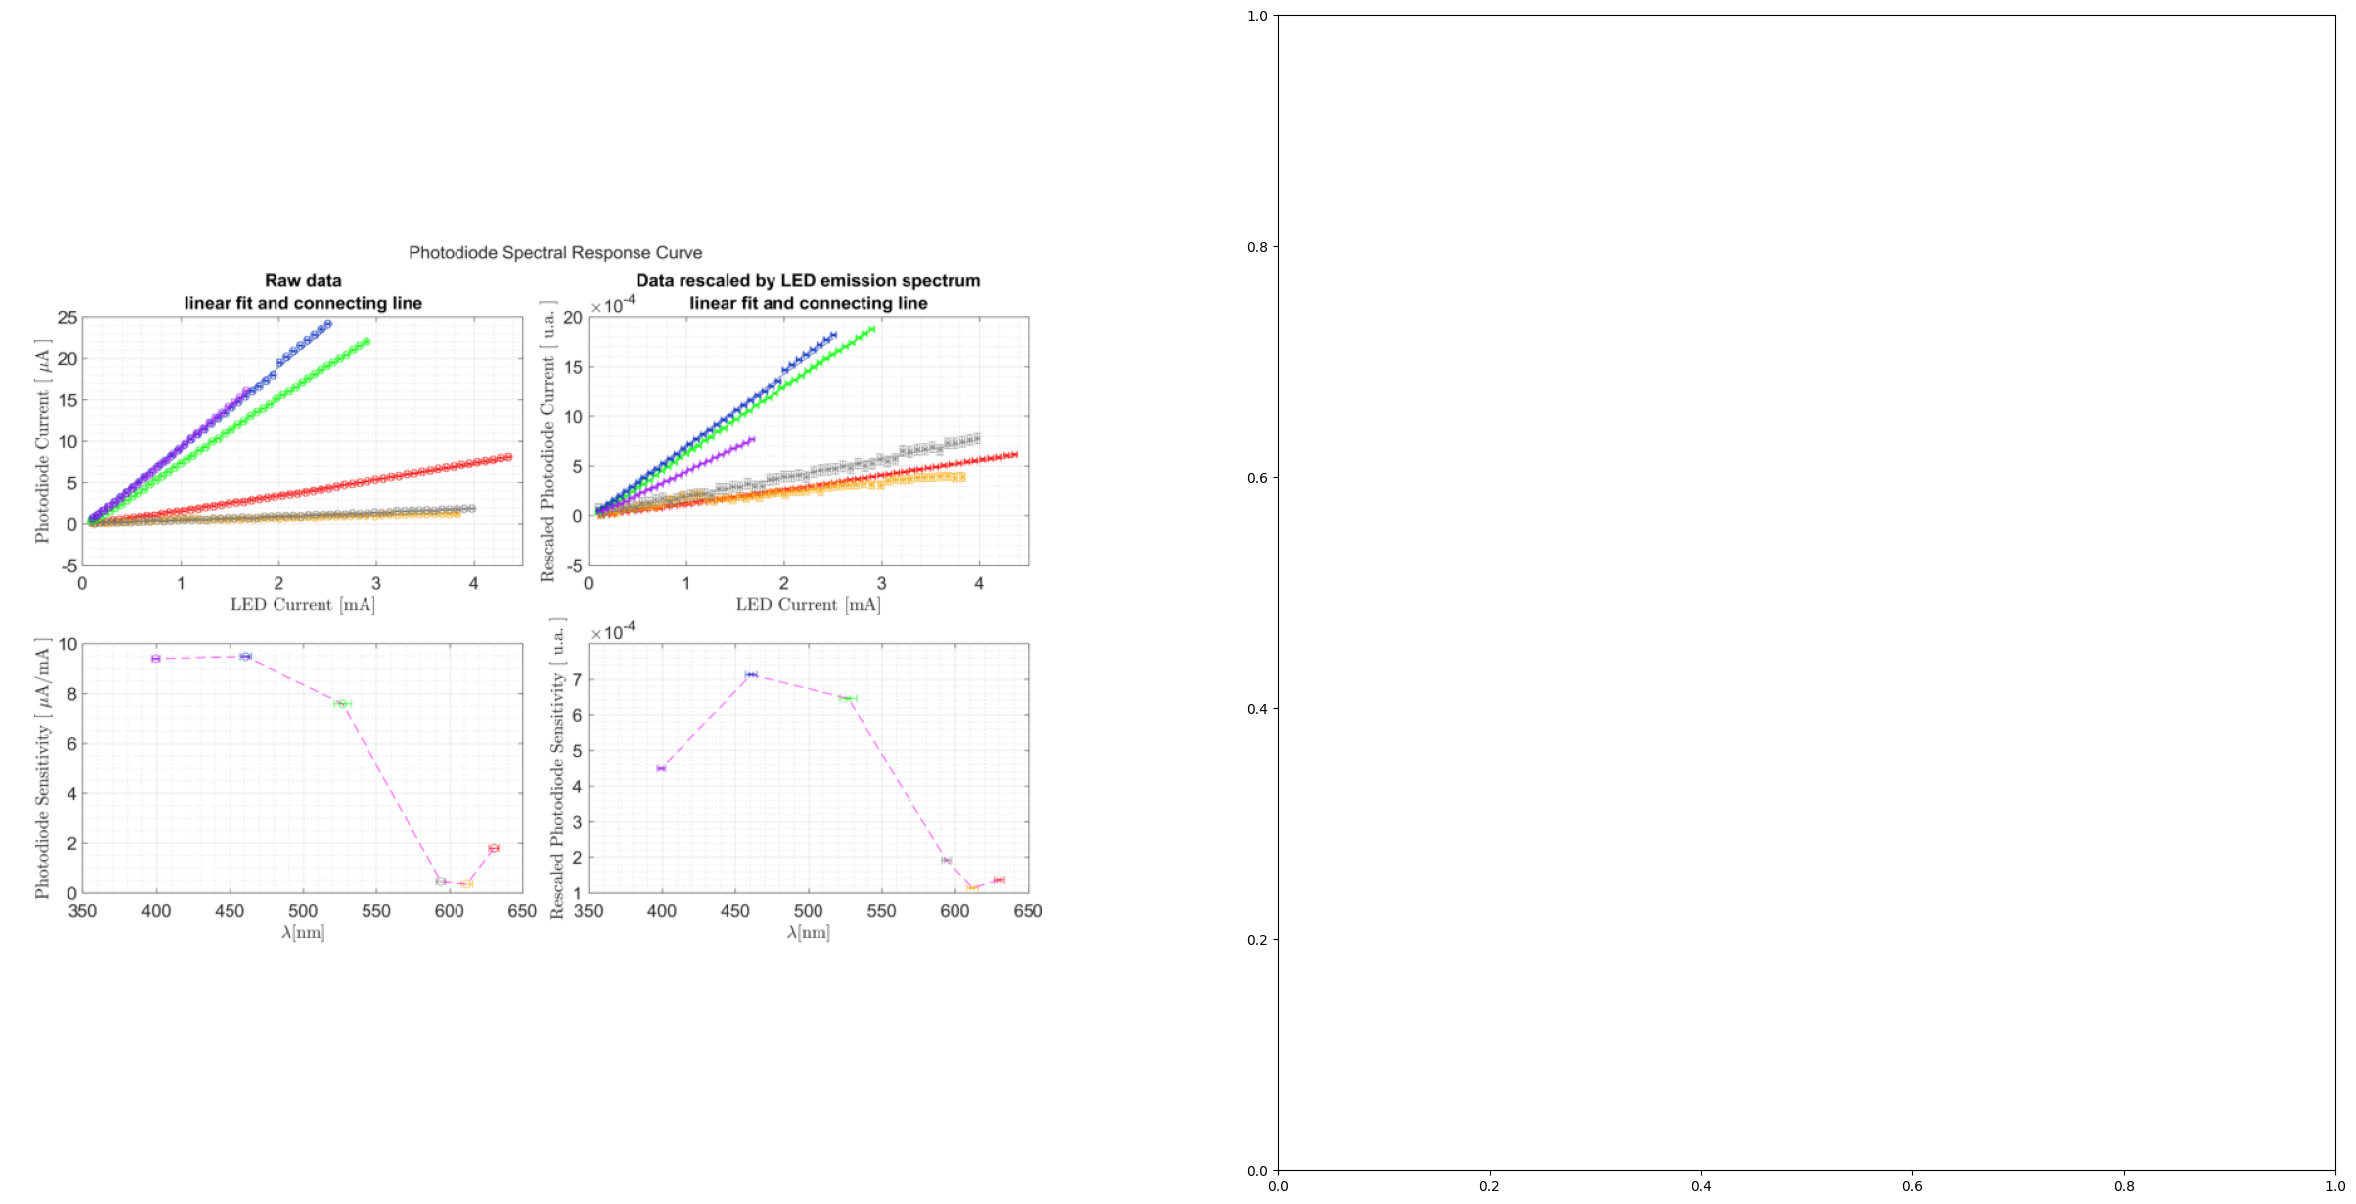

In [3]:
pdfList = ['Media/SpectralResponse.pdf']
cols  = 2
rows = 1
display_pdfs_side_by_side(rows, cols, pdfList)